DATA INFORMATION

The training archive contains 25,000 images of cats and dogs. Train your algorithm on these files and predict the labels for test1.zip (1=dog, 0=cat)

DOWNLOAD DATASET

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-07-21 05:45:17--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.81.140.145, 2a02:26f0:6d00:688::e59, 2a02:26f0:6d00:6bf::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.81.140.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   120MB/s    in 6.5s    

2022-07-21 05:45:24 (121 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



UNZIP THE DATASET

In [3]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

IMPORT MODULES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import random
import warnings
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

CREATE DATAFRAME FOR INPUT AND OUTPUT

In [11]:
input_path=[]
label = []


for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
         if class_name == 'Cat':
             label.append(0)
         else:
             label.append(1) 
         input_path.append(os.path.join("PetImages", class_name, path )) 
print(input_path[0], label[0])              

PetImages/Dog/12172.jpg 1


In [12]:
len(label)

25002

In [14]:
len(input_path)

25002

In [28]:
df = pd.DataFrame()
df["images"] = input_path
df["label"] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages/Dog/5098.jpg      1
1  PetImages/Dog/8543.jpg      1
2  PetImages/Cat/4748.jpg      0
3  PetImages/Cat/1408.jpg      0
4  PetImages/Dog/8421.jpg      1

In [30]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [31]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db']

In [32]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

EXPLORATORY DATA ANALYSIS

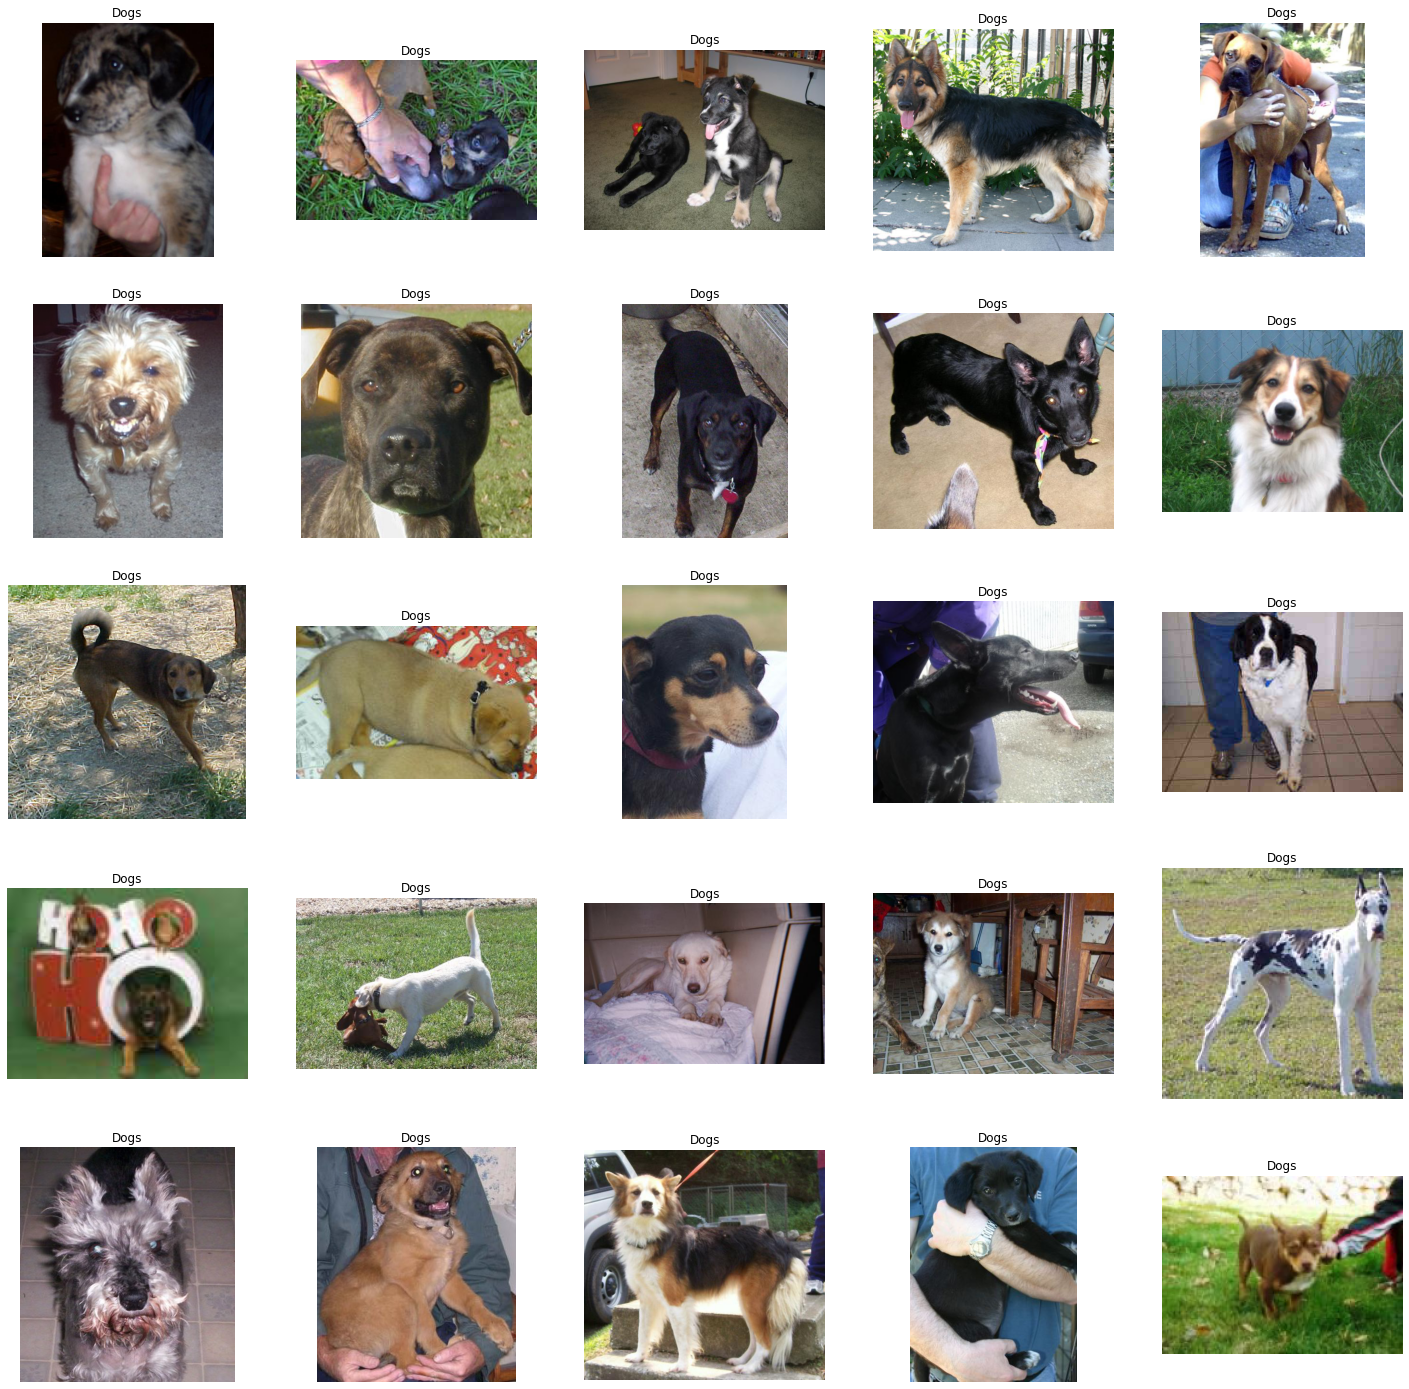

In [33]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

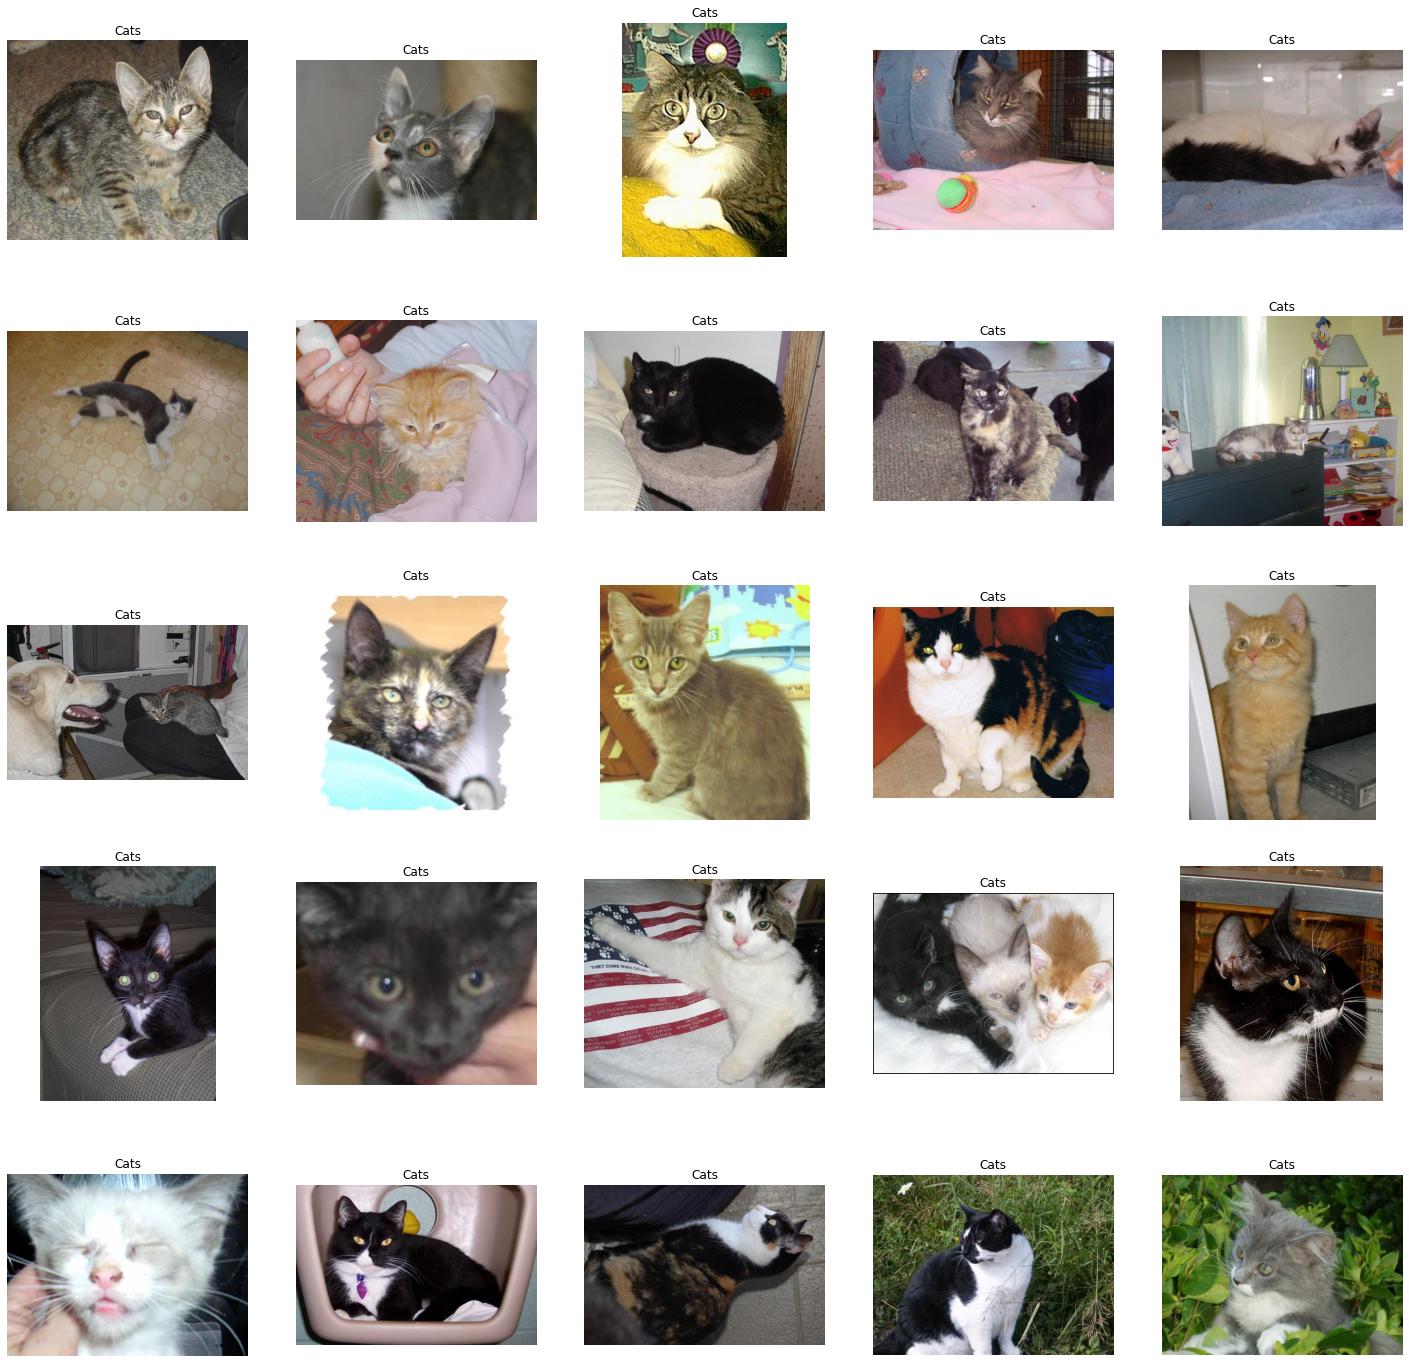

In [34]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

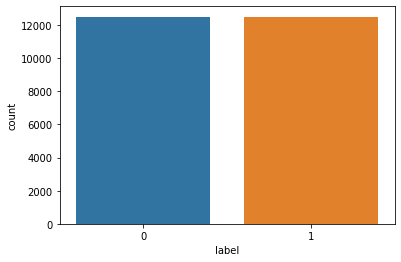

In [35]:
import seaborn as sns
sns.countplot(df['label'])

CREATE DATAGENERATOR fOR THE IMAGES

In [36]:
df['label'] = df['label'].astype('str')

In [37]:
df.head()

images label
0  PetImages/Dog/5098.jpg     1
1  PetImages/Dog/8543.jpg     1
2  PetImages/Cat/4748.jpg     0
3  PetImages/Cat/1408.jpg     0
4  PetImages/Dog/8421.jpg     1

In [38]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [40]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


MODEL CREATION

In [41]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [44]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 443s 11s/step - loss: 0.4431 - accuracy: 0.7914 - val_loss: 0.4290 - val_accuracy: 0.8012
Epoch 2/10
40/40 [==============================] - 423s 10s/step - loss: 0.4376 - accuracy: 0.7934 - val_loss: 0.4167 - val_accuracy: 0.8040
Epoch 3/10
40/40 [==============================] - 423s 10s/step - loss: 0.4266 - accuracy: 0.8001 - val_loss: 0.3987 - val_accuracy: 0.8176
Epoch 4/10
40/40 [==============================] - 427s 11s/step - loss: 0.4136 - accuracy: 0.8094 - val_loss: 0.3986 - val_accuracy: 0.8186
Epoch 5/10
40/40 [==============================] - 429s 11s/step - loss: 0.4193 - accuracy: 0.8029 - val_loss: 0.3866 - val_accuracy: 0.8270
Epoch 6/10
40/40 [==============================] - 423s 10s/step - loss: 0.3934 - accuracy: 0.8194 - val_loss: 0.3947 - val_accuracy: 0.8182
Epoch 7/10
40/40 [==============================] - 421s 10s/step - loss: 0.4014 - accuracy: 0.8156 - val_loss: 0.3606 - val_accuracy: 0.8396
Epoch 

VISUALIZION OF RESULTS

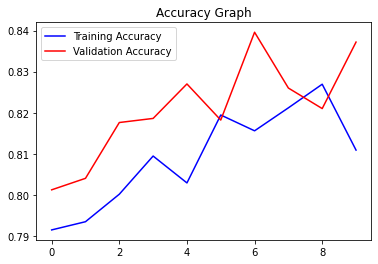

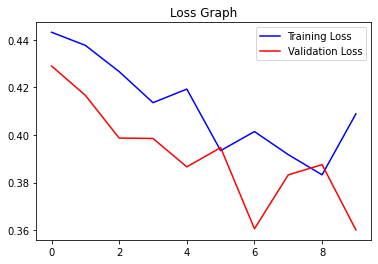

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()